In [160]:
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind

# RQ 3 + 4

In [189]:
# read csv
rq34 = pd.read_csv("./data/rq_3_4.csv")
rq34.head()

,text_sentiment,product,issue_id,comment_id,priority,issuetype
0,neutral,AAR,12963247.0,15972995.0,Major,bug
1,neutral,AAR,12963247.0,15972996.0,Major,bug
2,neutral,AAR,12963270.0,15261151.0,Major,bug
3,neutral,AAR,12963426.0,15261824.0,Major,bug
4,neutral,AAR,12963426.0,15262448.0,Major,bug


In [215]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

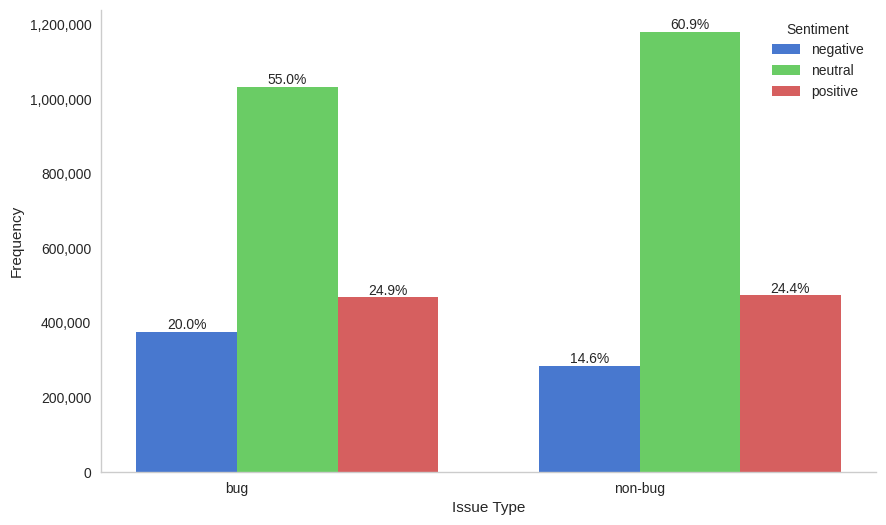

In [225]:
grouped = rq34.groupby(['issuetype', 'text_sentiment']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))  

sentiments = grouped.columns
issue_types = grouped.index

bar_width = 0.25
bar_positions = list(range(len(issue_types)))

for i, sentiment in enumerate(sentiments):
    offset = i * bar_width - bar_width / 2

    bars = plt.bar([pos + offset for pos in bar_positions], grouped[sentiment], width=bar_width, label=sentiment)
    
    for bar, pct in zip(bars, grouped_percent[sentiment]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)


# Customize plot
plt.xlabel('Issue Type')
plt.ylabel('Frequency')
# plt.title('Sentiment Frequencies by Issue Type')
plt.xticks(bar_positions, issue_types)
plt.legend(title='Sentiment', loc='upper right')
plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)  
plt.gca().get_xaxis().tick_bottom() 
plt.gca().get_yaxis().tick_left()  
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(False)
plt.show()

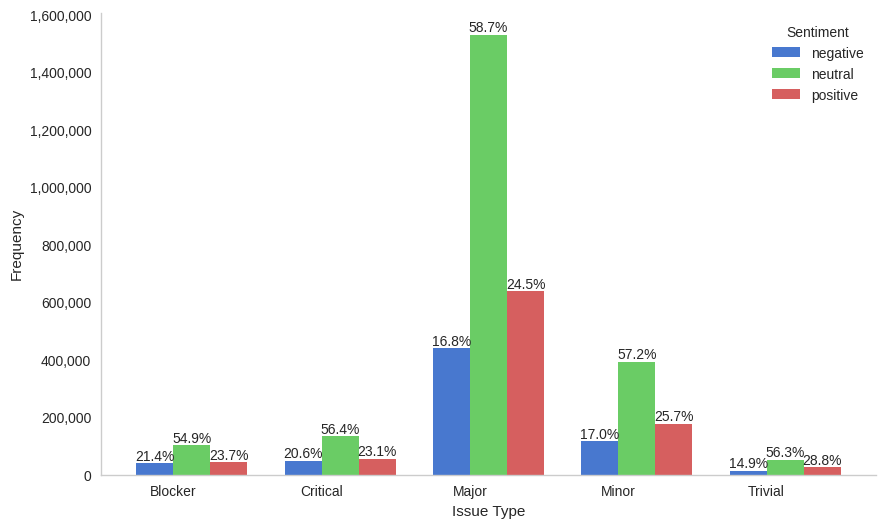

In [226]:
grouped = rq34.groupby(['priority', 'text_sentiment']).size().unstack(fill_value=0)
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))  

priorities = grouped.columns
issue_types = grouped.index

bar_width = 0.25
bar_positions = list(range(len(issue_types)))

for i, priority in enumerate(priorities):
    offset = i * bar_width - bar_width / 2

    bars = plt.bar([pos + offset for pos in bar_positions], grouped[priority], width=bar_width, label=priority)
    
    for bar, pct in zip(bars, grouped_percent[priority]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

# Customize plot
plt.xlabel('Issue Type')
plt.ylabel('Frequency')
# plt.title('Sentiment Frequencies by Issue Priority')
plt.xticks(bar_positions, issue_types)
plt.legend(title='Sentiment', loc='upper right')
plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)  
plt.gca().get_xaxis().tick_bottom() 
plt.gca().get_yaxis().tick_left()  
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(False)
plt.show()

In [175]:
len(rq34)

3814162

In [178]:
rq3_contingency_table = pd.crosstab(rq34['issuetype'], rq34['text_sentiment'])
rq3_contingency_table

text_sentiment,negative,neutral,positive
issuetype,,,
bug,376168,1032756,467624
non-bug,283312,1180785,473517


In [179]:
chi2, p, dof, expected = stats.chi2_contingency(rq3_contingency_table)

print(f"\nChi-Square Test Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi-Square Test Statistic: 22038.492955364705
p-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
[[ 324460.75311956 1089050.7368245   463036.51005594]
 [ 335019.24688044 1124490.2631755   478104.48994406]]


In [181]:
rq4_contingency_table = pd.crosstab(rq34['priority'], rq34['text_sentiment'])
rq4_contingency_table

text_sentiment,negative,neutral,positive
priority,,,
Blocker,39716,102122,44046
Critical,49265,134894,55221
Major,439509,1531149,638294
Minor,117301,393634,177164
Trivial,13689,51742,26416


In [182]:
# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(rq4_contingency_table)

print(f"\nChi-Square Test Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi-Square Test Statistic: 5961.983421818359
p-value: 0.0
Degrees of Freedom: 8
Expected Frequencies:
[[  32139.89870383  107877.39357793   45866.70771824]
 [  41389.51685849  138923.68614128   59066.79700023]
 [ 451095.59189148 1514099.87804189  643756.53006663]
 [ 118974.37196427  399336.82642714  169787.80160858]
 [  15880.62058193   53303.21581176   22663.16360632]]
